In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
%matplotlib inline

In [41]:
#Loading the students data to determine their admission status based on scores of 2 exams
def load_data(filename):
    data = np.loadtxt(filename, delimiter=",")
    X = data[:, :2]
    y = data[:, 2]
    print(f"X_train.shape: {X.shape}")
    print(f"y_train.shape: {y.shape}")
    print(f"Classes: {np.unique(y)}")
    print("Type of X_train:",type(X))
    print("Type of y_train:",type(y))
    print("First five elements in X_train are:\n", X[:5])
    return X, y

X_train, y_train = load_data("E:\Learning\ML\Learning Practice\Code\ML Specialization Coursera\ex2data1.txt")

X_train.shape: (100, 2)
y_train.shape: (100,)
Classes: [0. 1.]
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]


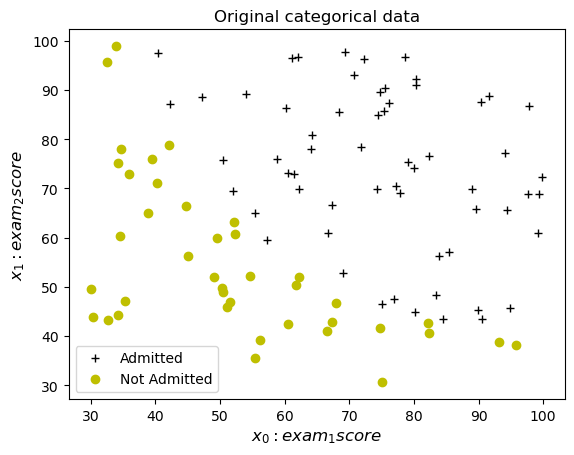

In [3]:
def plot_data(x, y, pos_label="y=1", neg_label="y=0", loc="best"):
    pos = y==1
    neg = y==0
    plt.plot(x[pos, 0], x[pos, 1], "k+", label=pos_label)
    plt.plot(x[neg, 0], x[neg, 1], "yo", label=neg_label)
    plt.legend(loc=loc)


plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not Admitted")
plt.xlabel(r"$x_0: exam_1 score$", fontsize=12)
plt.ylabel(r"$x_1: exam_2 score$", fontsize=12)
plt.title("Original categorical data")
plt.show()


In [22]:
#Logistic Regression without regularization
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_logistic_cost(X, y, w, b):
    m, n = X.shape
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)
    z = X @ w + b
    f = sigmoid(z)
    cost = (1 / m) * (np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f))) 
    cost = cost[0, 0] # we get a 2d array. [[cost]]. Hence this step
    return cost

def compute_gradients(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0.0
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)
    z = X @ w + b
    f = sigmoid(z)
    dj_dw = (1 / m) * np.dot((f - y).T, X) 
    dj_db = (1 / m) * np.sum((f - y))
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, alpha, num_iters):
    w = copy.deepcopy(w)
    b = b
    hist = dict()
    hist["params"] , hist["grads"], hist["cost"], hist["iter"] = [], [], [], []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradients(X, y, w, b)
        
        #parameter update
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save hist at each iteration
        if i< 100000: #prevent resource exhaustion
            #updating the history
            hist["params"].append([w, b])
            hist["grads"].append([dj_dw, dj_db])
            hist["iter"].append(i)
            cost = compute_logistic_cost(X, y, w, b)
            hist["cost"].append(cost)
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters-1):
            print(f"Iteration {i} : Cost {cost:8.2f}")
    
    return w, b, hist

def run_gradient_descent(X, y, w, b, alpha=0.1, num_iters=1000):
    m, n = X.shape

    w_out, b_out, hist = gradient_descent(X, y, w, b, alpha, num_iters)
    print(f"Final Params- w: {w_out.tolist()} , b: {b_out}")
    return w_out, b_out, hist

np.random.seed(1)
#w_init = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)

w_init = 0.01 * (np.random.rand(2) - [0.5, 0.5])
# w_init = w_init.reshape(-1, 1)
# print(w_init)

b_init = -8
alpha = 0.001
num_iters = 10000


w_out, b_out, hist = run_gradient_descent(X_train, y_train, w_init, b_init, alpha=alpha, num_iters=num_iters)

Iteration 0 : Cost     0.96
Iteration 1000 : Cost     0.31
Iteration 2000 : Cost     0.30
Iteration 3000 : Cost     0.30
Iteration 4000 : Cost     0.30
Iteration 5000 : Cost     0.30
Iteration 6000 : Cost     0.30
Iteration 7000 : Cost     0.30
Iteration 8000 : Cost     0.30
Iteration 9000 : Cost     0.30
Iteration 9999 : Cost     0.30
Final Params- w: [[0.07125355114712252, 0.06482887636596503]] , b: -8.188622906639246


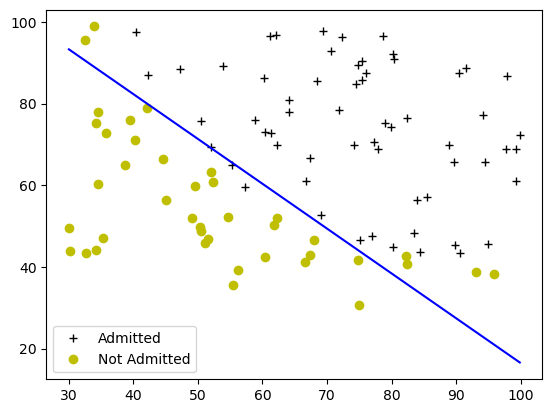

In [32]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    out = []
    degree = 6 #mapping meaning - generating poylmial features of upto degree 6 - x1x2 , x1^2, x2^2, ..
    for i in range(1, degree+1):
        for j in range(i+1):
            out.append((X1**(i-j) * X2**(j)))
    return np.stack(out, axis=1)

def plot_decision_boundary(X, y, w, b):
    #plotting original data
    plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not Admitted")
    
    #checking if the number of features are only 2 . If not, else block will handle
    if X.shape[1] <= 2:
        #generating grid of points within the range of input data X
        plot_x = np.array([ min(X[:, 0]), max(X[:, 0]) ])
        
        #calculates the predicted labels for each grid point using the given parameters w and b
        plot_y = (- 1 / w[1]) * (w[0] * plot_x + b) # w0x0 + w1x1 + b = 0. Note that our y axis is x1. x1 = (- 1 / w1) * ( w[0] * x0 + b)
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        #if the number of features are > 2
        u = np.linspace(-1, 1.5, 50) #feature 1
        v = np.linspace(-1, 1.5, 50) #feature 2

        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
#         xx, yy = np.meshgrid(u.ravel(), v.ravel())
#         z = np.zeros(xx.shape[0])
#         for i in range(xx.shape[0]):
#             z[i,j] = sig(np.dot(map_feature(xx, yy), w) + b)
#         z = z.reshape(u.shape)
        
        # Plot z = 0
        plt.contour(u, v, z, levels=[0.5], colors="g")

final_w = w_out.reshape(-1)
plot_decision_boundary(X_train, y_train, final_w, b_out)

    Notes on plot decision boundary
    -------------------------------
    In this code, the plot_decision_boundary function first generates a grid of points within the range of the input data X. It then calculates the predicted labels for each grid point using the given parameters w and b. The decision boundary is plotted using contourf, and the input data points are plotted using scatter.
    
    The expression plot_y = (-1. / w[1]) * (w[0] * plot_x + b) calculates the y-coordinates for the decision boundary line when the number of features in X is less than or equal to 2. Let's break it down:

    - w represents the coefficients (weights) of the logistic regression model.
    - b represents the bias (intercept) of the logistic regression model.
    - plot_x is an array containing the x-coordinates for the line. It is defined as np.array([min(X[:, 0]), max(X[:, 0])]).
    - plot_y will store the corresponding y-coordinates for the line.
    
    Now let's break down the expression step by step:

    - w[0] * plot_x + b: This calculates the linear combination of the weights and the x-coordinates, representing the line equation w[0]*x + w[1]*y + b = 0. Since the number of features is 2, we can rearrange the equation to solve for y in terms of x.
    (-1. / w[1]): This term multiplies the entire expression by -1 / w[1] to solve for y.
    
    - w[1] corresponds to the weight of the second feature (y-coordinate) in the line equation.
    - By multiplying by -1 / w[1], we isolate y on one side of the equation, so the line equation becomes y = (-1. / w[1]) * (w[0]*x + b).
    - The resulting plot_y array will contain the y-coordinates corresponding to the x-coordinates in plot_x for the decision boundary line.

    - By plotting plot_x and plot_y using plt.plot, we can visualize the decision boundary line in the plot. This line represents the separation between the two classes in the logistic regression model when we have only two features.

In [38]:
#prediction
def predict(X, w, b):
    w = w.reshape(-1)
    z = np.dot(X, w) + b
    y_probs = sigmoid(z)
    y_pred = np.where(y_probs <= 0.5, 0, 1)  
    return y_pred

preds = predict(X_train, w_out, b_out)

print(f"Training Accuracy: {np.mean(preds == y_train) * 100}")

Training Accuracy: 92.0


### With Regularization

X_train.shape: (118, 2)
y_train.shape: (118,)
Classes: [0. 1.]
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
First five elements in X_train are:
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]


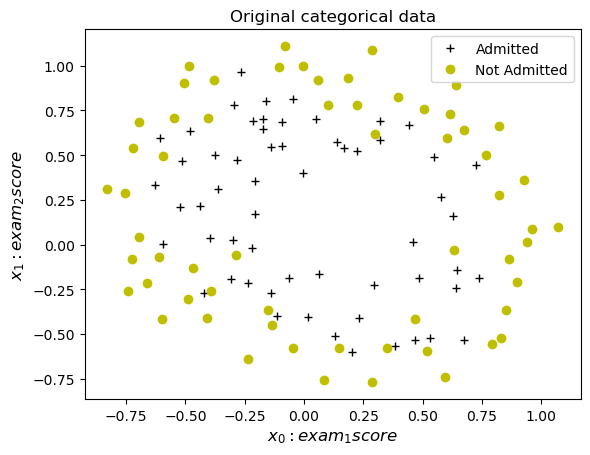

In [74]:
X_train, y_train = load_data("E:\Learning\ML\Learning Practice\Code\ML Specialization Coursera\ex2data2.txt")
plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not Admitted")
plt.xlabel(r"$x_0: exam_1 score$", fontsize=12)
plt.ylabel(r"$x_1: exam_2 score$", fontsize=12)
plt.title("Original categorical data")
plt.show()

    Above plot shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.


### Feature mapping
    One way to fit the data better is to create more features from each data point. In the provided function map_feature, we will map the features into all polynomial terms of x1 and x2 up to the sixth power
    
    As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector. x1 x2 x1^2 x1x2 x2^2 x1^3 ... x1x2^5 x2^6

    A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.

    While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [76]:
def map_feature(x1, x2):
    x1 = np.atleast_1d(x1)
    x2 = np.atleast_1d(x2)
    degree = 6
    out = [] #creates a list of polynomial feature mappings like x1x2, x1^2, x2^2, x1^2, .. 
    for i in range(1, degree+1):
        for j in range(i+1):
            out.append((x1**i-j * x2**j))
    return np.stack(out, axis=1)

print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)
X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [ 5.12670000e-02 -6.48293000e-01  2.62830529e-03 -6.96931695e-01
 -9.76140082e-01  1.34745327e-04 -6.99425255e-01 -9.78633642e-01
 -1.02692607e+00  6.90798869e-06 -6.99553092e-01 -9.78761479e-01
 -1.02705391e+00 -9.57980648e-01  3.54151856e-07 -6.99559646e-01
 -9.78768033e-01 -1.02706047e+00 -9.57987202e-01 -8.37711864e-01
  1.81563032e-08 -6.99559982e-01 -9.78768369e-01 -1.02706080e+00
 -9.57987538e-01 -8.37712200e-01 -7.03235933e-01]


X_train.shape: (118, 2)
y_train.shape: (118,)
Classes: [0. 1.]
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
First five elements in X_train are:
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]


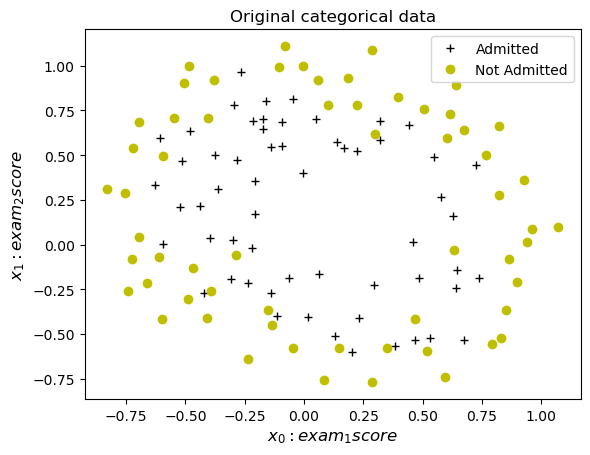

Iteration 0 : Cost     0.91
Iteration 1000 : Cost     0.53
Iteration 2000 : Cost     0.50
Iteration 3000 : Cost     0.49
Iteration 4000 : Cost     0.47
Iteration 5000 : Cost     0.46
Iteration 6000 : Cost     0.46
Iteration 7000 : Cost     0.45
Iteration 8000 : Cost     0.45
Iteration 9000 : Cost     0.44
Iteration 9999 : Cost     0.44
Final Params- w: [-0.018888319670806723, 0.6250054815788091, -2.0059019497640653, -1.3630832893558227, -0.8340919118736118, -0.5751431568124186, -0.13886331028714638, 0.7023480878498224, 0.5150951429576617, -1.2165989593786297, -0.9920609013519132, -0.04502565634108311, -0.7597633918964777, 0.5651838532301862, -0.8750419092498923, 0.10576201604926957, 0.5379908737425283, 0.44015521382140177, 0.6823492518860693, -0.15510091512752433, -0.6814127026525341, -0.1721585204002088, -0.13821471139744498, -0.0005412813737705994, 0.8389389250181711, -0.03767497477462951, -0.29162205954480536] , b: 2.015208293798263


In [85]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_logistic_cost(X, y, w, b, lambda_):
    m, n = X.shape
    z = X @ w + b
#     z = np.dot(map_feature(X[:, 0], X[:, 1]), w) + b
    f = sigmoid(z)
    cost = (1 / m) * (np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))
    regularised_cost = lambda_ / (2 * m) * np.sum(np.square(w))
    total_cost = cost + regularised_cost
    total_cost = total_cost[0, 0] # we get a 2d array. [[cost]]. Hence this step
    return total_cost

def compute_gradients(X, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0.0
    z = X @ w + b
#     z = np.dot(X, w) + b
    f = sigmoid(z)
    dj_dw = (1 / m) * np.dot(X.T, (f - y))
    dj_dw =  dj_dw + (lambda_ /  m) * w
    dj_db = (1 / m) * np.sum((f - y))
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, alpha, num_iters, lambda_):
    w = copy.deepcopy(w)
    w = w.reshape(-1, 1)
    y = y.reshape(-1, 1)
    b = b
    hist = dict()
    hist["params"] , hist["grads"], hist["cost"], hist["iter"] = [], [], [], []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradients(X, y, w, b, lambda_)

        #parameter update
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save hist at each iteration
        if i< 100000: #prevent resource exhaustion
            #updating the history
            hist["params"].append([w, b])
            hist["grads"].append([dj_dw, dj_db])
            hist["iter"].append(i)
            cost = compute_logistic_cost(X, y, w, b, lambda_)
            hist["cost"].append(cost)
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters-1):
            print(f"Iteration {i} : Cost {cost:8.2f}")
    
    return w, b, hist

def run_gradient_descent(X, y, w, b, alpha=0.1, num_iters=1000, lambda_=0.0):
    m, n = X.shape

    w_out, b_out, hist = gradient_descent(X, y, w, b, alpha, num_iters, lambda_)
    print(f"Final Params- w: {w_out.reshape(-1,).tolist()} , b: {b_out}")
    return w_out, b_out, hist


X_train, y_train = load_data("E:\Learning\ML\Learning Practice\Code\ML Specialization Coursera\ex2data2.txt")
plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not Admitted")
plt.xlabel(r"$x_0: exam_1 score$", fontsize=12)
plt.ylabel(r"$x_1: exam_2 score$", fontsize=12)
plt.title("Original categorical data")
plt.show()

np.random.seed(1)

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
w_init  = np.random.rand(X_mapped.shape[1]) - 0.5
b_init = 1.0
alpha = 0.01
num_iters = 10000
lambda_init = 0.01
w_out, b_out, hist = run_gradient_descent(X_mapped, y_train, w_init, b_init, alpha=alpha, num_iters=num_iters, lambda_=lambda_init)

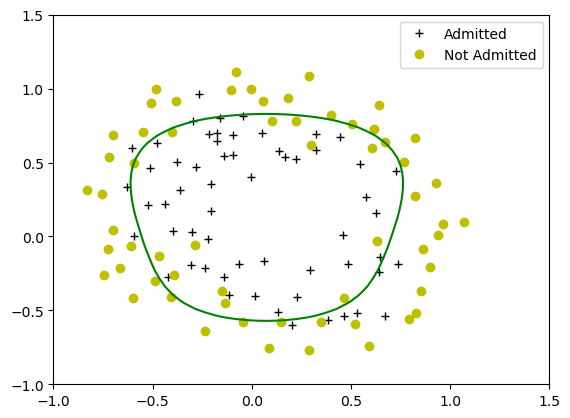

In [88]:
def plot_decision_boundary(X, y, w, b):
    #plotting original data
    plot_data(X_train, y_train, pos_label="Admitted", neg_label="Not Admitted")
    
    #checking if the number of features are only 2 . If not, else block will handle
    if X.shape[1] <= 2:
        
        plot_x = np.array([ min(X[:, 0]), max(X[:, 0]) ])
        plot_y = (- 1 / w[1]) * (w[0] * plot_x + b) # w0x0 + w1x1 + b = 0. Note that our y axis is x1. x1 = (- 1 / w1) * ( w[0] * x0 + b)
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        #if the number of features are > 2
        u = np.linspace(-1, 1.5, 50) #feature 1
        v = np.linspace(-1, 1.5, 50) #feature 2

        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        plt.contour(u, v, z, levels=[0.5], colors="g")

final_w = w_out.reshape(-1,)
plot_decision_boundary(X_mapped, y_train, final_w, b_out)


    After learning the parameters w, b the next step is to plot a decision boundary
    
    To help you visualize the model learned by this classifier, we will use our plot_decision_boundary function which plots the (non-linear) decision boundary that separates the positive and negative examples.

    In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced  grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.

In [91]:
#prediction
#Compute accuracy on the training set
#prediction
def predict(X, w, b):
    w = w.reshape(-1)
    z = np.dot(X, w) + b
    y_probs = sigmoid(z)
    y_pred = np.where(y_probs <= 0.5, 0, 1)  
    return y_pred

p = predict(X_mapped, w_out, b_out)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 78.813559


In [98]:
import numpy as np
import math

def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])), 
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mAll tests passed!') #\033[92m is a green color
    
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")
    
    np.random.seed(17)  
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"
    
    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0
    
    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0, 1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"
    
    print('\033[92mAll tests passed!')
    
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)
    
    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}" 
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}" 
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mAll tests passed!') 
    
def predict_test(target):
    np.random.seed(5)
    b = 0.5    
    w = np.random.randn(3)
    X = np.random.randn(8, 3)
    
    result = target(X, w, b)
    wrong_1 = [1., 1., 0., 0., 1., 0., 0., 1.]
    expected_1 = [1., 1., 1., 0., 1., 0., 0., 1.]
    if np.allclose(result, wrong_1):
        raise ValueError("Did you apply the sigmoid before applying the threshold?")
    assert result.shape == (len(X),), f"Wrong length. Expected : {(len(X),)} got: {result.shape}"
    assert np.allclose(result, expected_1), f"Wrong output: Expected : {expected_1} got: {result}"
    
    b = -1.7    
    w = np.random.randn(4) + 0.6
    X = np.random.randn(6, 4)
    
    result = target(X, w, b)
    expected_2 = [0., 0., 0., 1., 1., 0.]
    assert result.shape == (len(X),), f"Wrong length. Expected : {(len(X),)} got: {result.shape}"
    assert np.allclose(result,expected_2), f"Wrong output: Expected : {expected_2} got: {result}"

    print('\033[92mAll tests passed!')
    
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)
    
    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"
    
    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"
    
    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"
    
    print('\033[92mAll tests passed!') 
    
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    
    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"

    
    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"
    
    print('\033[92mAll tests passed!') 

In [99]:
#Unit tests
# compute_cost_test(compute_cost)
# sigmoid_test(sigmoid)
# compute_gradient_test(compute_gradient)
# compute_cost_reg_test(compute_cost_reg)
# compute_gradient_reg_test(compute_gradient_reg)
# predict_test(predict)